# Importing libraries

In [1]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn import preprocessing  # For data preprocessing tasks
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets using SMOTE
import pickle  # For serializing and deserializing Python objects
import tensorflow as tf  # TensorFlow for building and training machine learning models
from sklearn.metrics import accuracy_score  # For evaluating model performance

# Importing TensorFlow and its components for building a neural network model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

In [80]:
# Loading the dataset from a CSV file into a Pandas DataFrame
dataset=pd.read_csv("weatherAUS.csv")

# Data Exploration

In [81]:
# Displaying the last few rows of the dataset to get a quick overview
dataset.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,6/21/17,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/17,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/17,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/17,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,6/25/17,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [82]:
# Checking the shape of the dataset (number of rows, number of columns)
dataset.shape

(145460, 23)

In [83]:
# Calculating the percentage of missing values for each column in the dataset
(dataset.isnull().sum()*100)/dataset.shape[0]

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [84]:
# Generating descriptive statistics for the dataset
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [85]:
# Counting the occurrences of each unique value in the "Location" column
dataset["Location"].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


## Analysis 1:

#### Dropping the columns with missing values percentage close to 40
#### Dropping the null values from rest of the columns

In [86]:
# Dropping selected columns ("Date", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm") from the dataset
dataset.drop(["Date","Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)

# Dropping rows with missing values from the dataset
dataset.dropna(inplace=True)

In [42]:
def piechart(dataset,cl):
    """
    Generate a pie chart for a specified column in the dataset.

    Parameters:
    - dataset: Pandas DataFrame
    - cl: Column name for which the pie chart is to be generated

    Returns:
    - String: Information about the success of saving the pie chart or a message about null values
    """
    # Initialize an empty list
    lst = []

    # Get the count of unique values in the specified column
    lst1 = list(dataset[cl].value_counts())
    y = np.array(lst1)

    # Get unique labels for the pie chart
    labels = dataset[cl].unique().tolist()

    # Explode the first slice for better visibility
    explode = [0.2]

    # Create a figure for the pie chart
    fig = plt.figure()

    for i in range(len(labels)-1):
        explode.append(0)
        
    print("The plot for ",cl," is: \n")
    
    # Set up the pie chart with labels, explode, autopct, and shadow
    try:
        plt.pie(y, labels = labels,explode=explode,autopct='%1.1f%%',shadow=True);
        plt.tight_layout()
        
        # Save the pie chart as an image
        fig.savefig('piechart.png')
        
        return "Pie chart Saved succesfully"
    
    except:
        return "Input column has Null values"

The plot for  RainTomorrow  is: 



'Pie chart Saved succesfully'

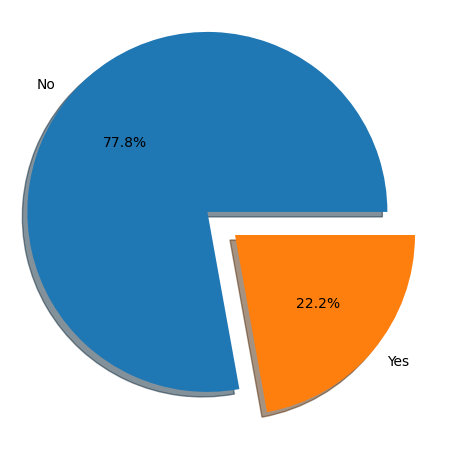

In [43]:
# using the piechart function to generate a pie chart for the "RainTomorrow" column in the dataset
piechart(dataset,"RainTomorrow")

## Analysis 2:

#### From the above chart we can see that there is a huge data imbalance in the classes. No occus 77.8% time whereas yes occurs only 22.2% time

In [44]:
# Creating a copy of the original dataset for further modifications
dataset_dummy=dataset.copy()

## Encoding the categorical value to numbers

In [45]:
# Using LabelEncoder to encode categorical variables in the dataset
label_encoder = preprocessing.LabelEncoder() 

# Iterating through columns in the dataset and applying label encoding if the column type is the same as the corresponding 
# column in the copied dataset
for i in dataset.columns:
    if type(dataset[i][0])==type(dataset_dummy["Location"][0]):

        dataset[i]= label_encoder.fit_transform(dataset[i]) 

In [47]:
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


## Dividing the dataset in x and y

In [48]:
# Separating the dataset into features (x) and the target variable (y)
x=dataset.drop("RainTomorrow",axis=1)  # Features
y=dataset["RainTomorrow"] # Target variable

### Using SMOTE

In [49]:
# Printing the counts of each class before oversampling
print("Before OverSampling, counts of label '1': ",str(sum(y==1))) 
print("Before OverSampling, counts of label '0': ",str(sum(y==0)))

# Importing SMOTE and applying oversampling to balance the classes
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE
sm = SMOTE(random_state = 2) 

# Applying SMOTE to generate synthetic samples and balance the classes
x_new, y_new = sm.fit_resample(x, y) 

Before OverSampling, counts of label '1':  25019
Before OverSampling, counts of label '0':  87906


In [50]:
# Printing the counts of each class after oversampling
print("After OverSampling label '1': ",str(sum(y_new==1))) 
print("After OverSamplinglabel '0': ",str(sum(y_new==0))) 

After OverSampling label '1':  87906
After OverSamplinglabel '0':  87906


In [51]:
# Splitting the oversampled dataset into training and testing sets
# x_train: features for training
# x_test: features for testing
# y_train: target variable for training
# y_test: target variable for testing
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

In [52]:
# Checking the shape of the training features
x_train.shape

(123068, 17)

In [68]:
# Checking the shape of the test features
x_test.shape

(52744, 17)

# Creating a Artificial Neural Network

In [75]:
# Number of features in the input
num_features = x_train.shape[1]

# Create a Sequential model
model = Sequential()

# Input layer with ReLU activation function
model.add(Dense(units=x_train.shape[1], activation='relu', input_dim=num_features))

# Hidden layers with ReLU activation function
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer with Sigmoid activation function (for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using backpropagation
history = model.fit(x_train, y_train, epochs=50, batch_size=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
4923/4923 [==============================] - 28s 5ms/step - loss: 0.5673 - accuracy: 0.7369 - val_loss: 0.4720 - val_accuracy: 0.7738
Epoch 2/50
4923/4923 [==============================] - 26s 5ms/step - loss: 0.4840 - accuracy: 0.7669 - val_loss: 0.4682 - val_accuracy: 0.7781
Epoch 3/50
4923/4923 [==============================] - 26s 5ms/step - loss: 0.4750 - accuracy: 0.7733 - val_loss: 0.4833 - val_accuracy: 0.7737
Epoch 4/50
4923/4923 [==============================] - 26s 5ms/step - loss: 0.4706 - accuracy: 0.7753 - val_loss: 0.4780 - val_accuracy: 0.7680
Epoch 5/50
4923/4923 [==============================] - 26s 5ms/step - loss: 0.4677 - accuracy: 0.7772 - val_loss: 0.4658 - val_accuracy: 0.7773
Epoch 6/50
4923/4923 [==============================] - 27s 5ms/step - loss: 0.4661 - accuracy: 0.7788 - val_loss: 0.4662 - val_accuracy: 0.7787
Epoch 7/50
4923/4923 [==============================] - 26s 5ms/step - loss: 0.4634 - accuracy: 0.7789 - val_loss: 0.4705 - val_ac

In [76]:
# Save the trained model to a file
model.save('annmod.h5')

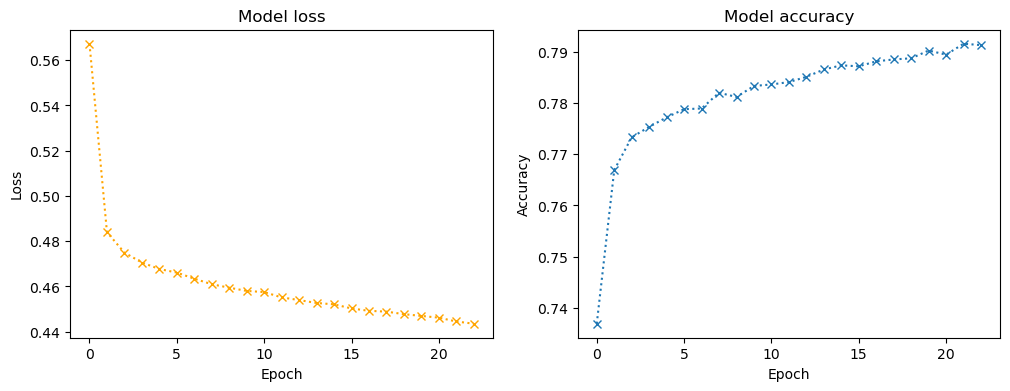

In [77]:
# Create a figure with two subplots for loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],marker='x',color='orange',linestyle='dotted')

plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'],marker='x',linestyle='dotted')

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Show the plots
plt.show()

In [78]:
# Load the saved model from the file 'model.h5'
model_final = load_model('annmod.h5')

# Evaluating the accuracy

In [79]:
# Predict on the test set
y_pred = model_final.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy on the test set: {accuracy:.4f}')

1649/1649 [==============================] - 5s 3ms/step
Accuracy on the test set: 0.7920


In [59]:
y_pred

array([[0.02894058],
       [0.12523846],
       [0.30836695],
       ...,
       [0.16196153],
       [0.95864385],
       [0.7276201 ]], dtype=float32)

In [60]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

# Hyper-parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the Keras model
def create_model(units1=64, units2=64, units3=64, learning_rate=0.001):
    print("units1: " + str(units1) + "  " + "units2: " + str(units2) + "  "+ "units3: "  + str(units3) + "  " 
          + "learning_rate: " + str(learning_rate))
    model = Sequential()
    model.add(Dense(units=x_train.shape[1], activation='relu', input_dim=num_features))
    model.add(Dense(units=units1, activation='relu'))
    model.add(Dense(units=units2, activation='relu'))
    model.add(Dense(units=units3, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Create a KerasClassifier with the create_model function
keras_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, validation_split=0.2, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'units1': [64, 128],
    'units2': [64, 128],
    'learning_rate': [0.001, 0.01]
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring='accuracy', cv=2)
grid_result = grid.fit(x_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy found: ", grid_result.best_score_)

C:\Users\ambat\AppData\Local\Temp\ipykernel_28324\2720857395.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, validation_split=0.2, verbose=0)


units1: 64  units2: 64  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 3s 1ms/step
units1: 64  units2: 64  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 3s 1ms/step
units1: 64  units2: 128  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 3s 1ms/step
units1: 64  units2: 128  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 4s 2ms/step
units1: 128  units2: 64  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 4s 2ms/step
units1: 128  units2: 64  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 4s 2ms/step
units1: 128  units2: 128  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 3s 1ms/step
units1: 128  units2: 128  units3: 64  learning_rate: 0.001
1923/1923 [==============================] - 4s 2ms/step
units1: 64  units2: 64  units3: 64  learning_rate: 0.01
1923/1923 [=============